In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
from sklearn import datasets, decomposition
from sklearn.manifold import TSNE

from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, MACCSkeys
from rdkit.Chem import AllChem, Descriptors, Descriptors3D, Draw, rdMolDescriptors
from rdkit.DataManip.Metric.rdMetricMatrixCalc import GetTanimotoSimMat, GetTanimotoDistMat

import os
import progressbar

from math import pi

table=pd.DataFrame()
i=0
mols=Chem.SDMolSupplier('DrugBank.sdf')
bar=progressbar.ProgressBar(max_value=len(mols))
for mol in mols:
    if mol:
        #AllChem.Compute2DCoords(mol)
        Chem.SanitizeMol(mol)
        Chem.RemoveHs(mol)
        table.loc[i,'Smiles']=Chem.MolToSmiles(mol,True)
        table.loc[i,'MolWt']=Descriptors.MolWt(mol)
        table.loc[i,'LogP']=Descriptors.MolLogP(mol)
        table.loc[i,'NumHAcceptors']=Descriptors.NumHAcceptors(mol)
        table.loc[i,'NumHDonors']=Descriptors.NumHDonors(mol)
        table.loc[i,'NumHeteroatoms']=Descriptors.NumHeteroatoms(mol)
        table.loc[i,'NumRotableBonds']=Descriptors.NumRotatableBonds(mol)
        table.loc[i,'NumHeavyAtoms']=Descriptors.HeavyAtomCount (mol)
        table.loc[i,'MolMR']=Descriptors.MolMR (mol)
        table.loc[i,'NumAliphaticCarbocycles']=Descriptors.NumAliphaticCarbocycles(mol)
        table.loc[i,'NumAliphaticHeterocycles']=Descriptors.NumAliphaticHeterocycles(mol)
        table.loc[i,'NumAliphaticRings']=Descriptors.NumAliphaticRings(mol)
        table.loc[i,'NumAromaticCarbocycles']=Descriptors.NumAromaticCarbocycles(mol)
        table.loc[i,'NumAromaticHeterocycles']=Descriptors.NumAromaticHeterocycles(mol)
        table.loc[i,'NumAromaticRings']=Descriptors.NumAromaticRings(mol)
        table.loc[i,'RingCount']=Descriptors.RingCount(mol)
        table.loc[i,'FractionCSP3']=Descriptors.FractionCSP3(mol)
        table.loc[i,'NumNHOH']=Descriptors.NHOHCount(mol)
        table.loc[i,'NumNO']=Descriptors.NOCount(mol)
        table.loc[i,'DataBase']='DrugBank'

        try:
            #AllChem.MMFFOptimizeMolecule(mol,mmffVariant='MMFF94s')
            table.loc[i,'TPSA']=Descriptors.TPSA(mol)
            table.loc[i,'PMI1']=Descriptors3D.PMI1(mol)
            table.loc[i,'PMI2']=Descriptors3D.PMI2(mol)
            table.loc[i,'PMI3']=Descriptors3D.PMI3(mol)
            table.loc[i,'PBF']=rdMolDescriptors.CalcPBF(mol)
            table.loc[i,'NPR1']=rdMolDescriptors.CalcNPR1(mol)
            table.loc[i,'NPR2']=rdMolDescriptors.CalcNPR2(mol)
            table.loc[i,'InertialShapeFactor']=Descriptors3D.InertialShapeFactor(mol)
            table.loc[i,'Asphericity']=Descriptors3D.Asphericity(mol)
            table.loc[i,'Eccentricity']=Descriptors3D.Eccentricity(mol)
            table.loc[i,'InertialShapeFactor']=Descriptors3D.InertialShapeFactor(mol)
            table.loc[i,'RadiusOfGyration']=Descriptors3D.RadiusOfGyration(mol)
            table.loc[i,'SpherocityIndex']=Descriptors3D.SpherocityIndex(mol)
            i=i+1
            bar.update(i)
        except Exception:
            i=i+1
            continue

#table=pd.DataFrame()
i=table.index[-1]+1
mols=Chem.SDMolSupplier('compounds.sdf')
bar=progressbar.ProgressBar(max_value=len(mols))
for mol in mols:
    if mol:
        #AllChem.Compute2DCoords(mol)
        Chem.SanitizeMol(mol)
        Chem.RemoveHs(mol)
        table.loc[i,'Smiles']=Chem.MolToSmiles(mol,True)
        table.loc[i,'MolWt']=Descriptors.MolWt(mol)
        table.loc[i,'LogP']=Descriptors.MolLogP(mol)
        table.loc[i,'NumHAcceptors']=Descriptors.NumHAcceptors(mol)
        table.loc[i,'NumHDonors']=Descriptors.NumHDonors(mol)
        table.loc[i,'NumHeteroatoms']=Descriptors.NumHeteroatoms(mol)
        table.loc[i,'NumRotableBonds']=Descriptors.NumRotatableBonds(mol)
        table.loc[i,'NumHeavyAtoms']=Descriptors.HeavyAtomCount (mol)
        table.loc[i,'MolMR']=Descriptors.MolMR (mol)
        table.loc[i,'NumAliphaticCarbocycles']=Descriptors.NumAliphaticCarbocycles(mol)
        table.loc[i,'NumAliphaticHeterocycles']=Descriptors.NumAliphaticHeterocycles(mol)
        table.loc[i,'NumAliphaticRings']=Descriptors.NumAliphaticRings(mol)
        table.loc[i,'NumAromaticCarbocycles']=Descriptors.NumAromaticCarbocycles(mol)
        table.loc[i,'NumAromaticHeterocycles']=Descriptors.NumAromaticHeterocycles(mol)
        table.loc[i,'NumAromaticRings']=Descriptors.NumAromaticRings(mol)
        table.loc[i,'RingCount']=Descriptors.RingCount(mol)
        table.loc[i,'FractionCSP3']=Descriptors.FractionCSP3(mol)
        table.loc[i,'NumNHOH']=Descriptors.NHOHCount(mol)
        table.loc[i,'NumNO']=Descriptors.NOCount(mol)
        if mol.HasSubstructMatch(Chem.MolFromSmarts('c1nnnn1'))==True:
            table.loc[i,'DataBase']='Tetrazol'
        else:
            table.loc[i,'DataBase']='Ugi'
        try:
            #AllChem.MMFFOptimizeMolecule(mol,mmffVariant='MMFF94s')
            table.loc[i,'TPSA']=Descriptors.TPSA(mol)
            table.loc[i,'PMI1']=Descriptors3D.PMI1(mol)
            table.loc[i,'PMI2']=Descriptors3D.PMI2(mol)
            table.loc[i,'PMI3']=Descriptors3D.PMI3(mol)
            table.loc[i,'PBF']=rdMolDescriptors.CalcPBF(mol)
            table.loc[i,'NPR1']=rdMolDescriptors.CalcNPR1(mol)
            table.loc[i,'NPR2']=rdMolDescriptors.CalcNPR2(mol)
            table.loc[i,'InertialShapeFactor']=Descriptors3D.InertialShapeFactor(mol)
            table.loc[i,'Asphericity']=Descriptors3D.Asphericity(mol)
            table.loc[i,'Eccentricity']=Descriptors3D.Eccentricity(mol)
            table.loc[i,'InertialShapeFactor']=Descriptors3D.InertialShapeFactor(mol)
            table.loc[i,'RadiusOfGyration']=Descriptors3D.RadiusOfGyration(mol)
            table.loc[i,'SpherocityIndex']=Descriptors3D.SpherocityIndex(mol)
            i=i+1
            bar.update(i)
        except Exception:
            i=i+1
            continue
table.to_csv ('Descriptors.csv') 

In [2]:
table=pd.read_csv('Descriptors.csv',index_col=[0])

In [3]:
table.head()

,Smiles,MolWt,LogP,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotableBonds,NumHeavyAtoms,MolMR,NumAliphaticCarbocycles,...,PMI2,PMI3,PBF,NPR1,NPR2,InertialShapeFactor,Asphericity,Eccentricity,RadiusOfGyration,SpherocityIndex
0,O=C([O-])CC(O)(CC(=O)[O-])C(=O)[O-].O=C([O-])C...,574.368,-10.51270,14,2,17,10,29,58.4096,0,...,2.012297e+04,2.720695e+04,0.963196,0.307622,0.739626,0.000088,0.350165,0.951509,7.025217,0.129587
1,O=C([O-])c1ccccn1.O=C([O-])c1ccccn1.[Zn+2],309.596,-1.11230,6,0,7,2,19,57.1350,0,...,7.720338e+03,1.051484e+04,0.000000,0.265768,0.734232,0.000263,0.414594,0.964037,5.905201,0.000000
2,O=C([O-])C(O)C(O)C(O)C(O)CO.O=C([O-])C(O)C(O)C...,455.684,-9.65810,14,10,15,10,27,72.2400,0,...,1.916594e+04,2.185341e+04,0.759116,0.243633,0.877023,0.000165,0.439563,0.969868,7.311073,0.090516
3,NCCC(=O)[N-]C(Cc1cnc[nH]1)C(=O)[O-].[Zn+2],289.610,-1.68270,5,2,8,6,17,53.1241,0,...,7.483473e+03,7.778370e+03,0.724420,0.089600,0.962088,0.001380,0.756160,0.995978,5.362194,0.158721
4,CCC(C)C(/N=C(\O)C(Cc1ccccc1)/N=C(\O)C(CC(C)C)/...,4909.512,13.84688,71,73,128,169,343,1305.9427,0,...,1.550660e+06,1.697210e+06,4.259569,0.221321,0.913652,0.000002,0.479638,0.975201,19.933297,0.209634


In [4]:
table=table.sort_values('LogP',ascending=True)

In [ ]:
plt.rcParams['axes.linewidth'] = 1.5
plt.figure(figsize=(8,8))

ax=sns.scatterplot('NPR1','NPR2',data=table,hue='DataBase',s=22,palette=sns.color_palette("Set2", 3),linewidth=0.5,alpha=1)
x1, y1 = [0.5, 0], [0.5, 1]
x2, y2 = [0.5, 1], [0.5, 1]
x3, y3 = [0,1],[1,1]

plt.plot(x1, y1,x2,y2,x3,y3,c='gray',ls='--',lw=2)

plt.xlabel ('NPR1',fontsize=24,fontweight='bold')

plt.ylabel ('NPR2',fontsize=24,fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.text(0, 1.01,s='Rod',fontsize=20,horizontalalignment='center',verticalalignment='center',fontweight='bold')
plt.text(1, 1.01,s='Sphere',fontsize=20,horizontalalignment='center',verticalalignment='center',fontweight='bold')
plt.text(0.5, 0.49,s='Disc',fontsize=20,horizontalalignment='center',verticalalignment='center',fontweight='bold')

plt.legend(loc='lower right',frameon=False,prop={'size': 22},ncol=1)
plt.tick_params ('both',width=2,labelsize=18)
plt.tight_layout()

plt.savefig('NPR.png',dpi=300,quality=95,format='png')

plt.show()

In [5]:
table=table[table.TPSA <= 1000]

In [6]:
table.columns

Index(['Smiles', 'MolWt', 'LogP', 'NumHAcceptors', 'NumHDonors',
       'NumHeteroatoms', 'NumRotableBonds', 'NumHeavyAtoms', 'MolMR',
       'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles',
       'NumAliphaticRings', 'NumAromaticCarbocycles',
       'NumAromaticHeterocycles', 'NumAromaticRings', 'RingCount',
       'FractionCSP3', 'NumNHOH', 'NumNO', 'DataBase', 'TPSA', 'PMI1', 'PMI2',
       'PMI3', 'PBF', 'NPR1', 'NPR2', 'InertialShapeFactor', 'Asphericity',
       'Eccentricity', 'RadiusOfGyration', 'SpherocityIndex'],
      dtype='object')

In [7]:
correlation_table=table[['MolWt', 'LogP', 'NumHAcceptors', 'NumHDonors',
                         'NumHeteroatoms', 'NumRotableBonds', 'NumHeavyAtoms', 'MolMR',
                         'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles',
                         'NumAliphaticRings', 'NumAromaticCarbocycles',
                         'NumAromaticHeterocycles', 'NumAromaticRings', 'RingCount',
                         'FractionCSP3', 'NumNHOH', 'NumNO', 'TPSA', 'PMI1', 'PMI2',
                         'PMI3', 'PBF', 'NPR1', 'NPR2', 'InertialShapeFactor', 'Asphericity',
                         'Eccentricity', 'RadiusOfGyration', 'SpherocityIndex']].corr()

In [ ]:
correlation_table.shape

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(correlation_table,cmap='PuRd',cbar_kws=dict(label='Frequency',shrink=1,orientation='vertical',spacing='uniform',pad=0.02))

plt.title('Descriptors Correlation',size='22',weight='bold')
plt.xticks (rotation=90,fontsize=12)
plt.yticks (fontsize=12)
#ax.xaxis.tick_top()
plt.tick_params ('both',width=2,labelsize=12)
plt.show()

In [ ]:
descriptors = table[['MolWt', 'LogP','NumHeteroatoms','RingCount','FractionCSP3', 
                     'NumNHOH', 'NumNO', 'TPSA','PBF',
                     'InertialShapeFactor','RadiusOfGyration']].values

In [ ]:
descriptors_std = StandardScaler().fit_transform(descriptors)

In [ ]:
pca = PCA()
descriptors_2d = pca.fit_transform(descriptors_std)

In [ ]:
descriptors_pca= pd.DataFrame(descriptors_2d)
descriptors_pca.index = table.index
descriptors_pca.columns = ['PC{}'.format(i+1) for i in descriptors_pca.columns]
descriptors_pca.head(10)

In [ ]:
print(pca.explained_variance_ratio_) 
print(sum(pca.explained_variance_ratio_))

In [ ]:
plt.rcParams['axes.linewidth'] = 1.5
plt.figure(figsize=(8,6))
fig, ax = plt.subplots(figsize=(8,6))

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.plot([i+1 for i in range(len(var))],var,'k-',linewidth=2)
plt.xticks([i+1 for i in range(len(var))])
plt.ylabel('% Variance Explained',fontsize=16,fontweight='bold')
plt.xlabel('Pincipal Component (PC)',fontsize=16,fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.tick_params ('both',width=2,labelsize=12)

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(descriptors_pca['PC1'],descriptors_pca['PC2'],'.',color='k',markersize=2)
ax.set_title ('Principal Component Analysis',fontsize=16,fontweight='bold',family='sans-serif')
ax.set_xlabel ('PC1',fontsize=14,fontweight='bold')
ax.set_ylabel ('PC2',fontsize=14,fontweight='bold')

plt.tick_params ('both',width=2,labelsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# This normalization will be performed just for PC1 and PC2, but can be done for all the components.
scale1 = 1.0/(max(descriptors_pca['PC1']) - min(descriptors_pca['PC1']))
scale2 = 1.0/(max(descriptors_pca['PC2']) - min(descriptors_pca['PC2']))

# And we add the new values to our PCA table
descriptors_pca['PC1_normalized']=[i*scale1 for i in descriptors_pca['PC1']]
descriptors_pca['PC2_normalized']=[i*scale2 for i in descriptors_pca['PC2']]

In [ ]:
descriptors_pca.head(10)

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(descriptors_pca['PC1_normalized'],descriptors_pca['PC2_normalized'],'.',color='k',markersize=2)
ax.set_title ('Principal Component Analysis',fontsize=16,fontweight='bold',family='sans-serif')
ax.set_xlabel ('PC1',fontsize=14,fontweight='bold')
ax.set_ylabel ('PC2',fontsize=14,fontweight='bold')

plt.tick_params ('both',width=2,labelsize=12)

plt.tight_layout()
plt.show()

In [ ]:
table['PC1_normalized']=descriptors_pca['PC1_normalized']
table['PC2_normalized']=descriptors_pca['PC2_normalized']

In [ ]:
table=table.sort_values('PC2_normalized',ascending=False)

In [ ]:
plt.rcParams['axes.linewidth'] = 1.5
plt.figure(figsize=(8,8))

ax=sns.scatterplot('PC1_normalized','PC2_normalized',data=table,hue='DataBase',s=20,palette=sns.color_palette("Set2", 3),linewidth=0.2,alpha=1)

plt.xlabel ('PC1',fontsize=24,fontweight='bold')
ax.xaxis.set_label_coords(0.98, 0.45)
plt.ylabel ('PC2',fontsize=24,fontweight='bold')
ax.yaxis.set_label_coords(0.45, 0.98)

ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

lab=['MolWt', 'LogP','NumHeteroatoms','RingCount','FractionCSP3', 
     'NumNHOH', 'NumNO', 'TPSA','PBF',
     'InertialShapeFactor','RadiusOfGyration'] #Feature labels

l=np.transpose(pca.components_[0:2, :]) ## We will get the components eigenvectors (main features) for PC1 and PC2

n = l.shape[0]
for i in range(n):
    plt.arrow(0, 0, l[i,0], l[i,1],color= 'k',alpha=0.5,linewidth=1.8,head_width=0.025)
    plt.text(l[i,0]*1.25, l[i,1]*1.25, lab[i], color = 'k',va = 'center', ha = 'center',fontsize=16)

circle = plt.Circle((0,0), 1, color='gray', fill=False,clip_on=True,linewidth=1.5,linestyle='--')

plt.legend(loc='lower right',frameon=False,prop={'size': 22},ncol=1)

plt.tick_params ('both',width=2,labelsize=18)

ax.add_artist(circle)
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
plt.tight_layout()
plt.savefig('PCA.png',dpi=300,quality=95,format='png')
plt.show()

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n_clusters in range_n_clusters:
    fig, (ax1,ax2)= plt.subplots(1, 2)
    fig.set_size_inches(8, 4)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = kmeans.fit_predict(descriptors_pca[['PC1_normalized','PC2_normalized']])
    silhouette_avg = silhouette_score(descriptors_pca[['PC1_normalized','PC2_normalized']], cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(descriptors_pca[['PC1_normalized','PC2_normalized']], cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")


    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(descriptors_pca['PC1_normalized'], descriptors_pca['PC2_normalized'], 
                marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')


    # Labeling the clusters
    centers = kmeans.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    
plt.show()

kmeans = KMeans(n_clusters=2, random_state=10) # We define the best number of clusters
clusters = kmeans.fit(descriptors_pca[['PC1_normalized','PC2_normalized']]) #PC1 vs PC2 (normalized values)

descriptors_pca['Cluster_PC1_PC2'] = pd.Series(clusters.labels_, index=table.index)

plt.rcParams['axes.linewidth'] = 1.5
plt.figure(figsize=(10,8))

fig, ax = plt.subplots(figsize=(7,7))

color_code={ 0:        'magenta',\
             1.0:   'orange',\
             2.0:      'cyan',\
             3.0:           'c',\
             4.0:        'm',\
             5.0:        'y',\
             6.0:        'darkorange',
             7.0:       'k',
             }

for i in descriptors_pca.index: 
        ax.plot(descriptors_pca.loc[i].at['PC1_normalized'],descriptors_pca.loc[i].at['PC2_normalized'],
                    c=color_code[descriptors_pca.loc[i].at['Cluster_PC1_PC2']],
                    marker='o',markersize=2,markeredgecolor='k',alpha=0.3)
        

plt.xlabel ('PC1',fontsize=14,fontweight='bold')
ax.xaxis.set_label_coords(0.98, 0.45)
plt.ylabel ('PC2',fontsize=14,fontweight='bold')
ax.yaxis.set_label_coords(0.45, 0.98)
plt.tick_params ('both',width=2,labelsize=12)
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

lab=['MolWt', 'TPSA', 'NumRotableBonds', 'NumHDonors','NumHAcceptors','LogP','NPR1','NPR2','ISF'] #Feature labels

l=np.transpose(pca.components_[0:2, :]) ## We will get the components eigenvectors (main features) for PC1 and PC2

n = l.shape[0]
for i in range(n):
    plt.arrow(0, 0, l[i,0], l[i,1],color= 'k',alpha=0.6,linewidth=1.2,head_width=0.025)
    plt.text(l[i,0]*1.25, l[i,1]*1.25, lab[i], color = 'k',va = 'center', ha = 'center',fontsize=11)

circle = plt.Circle((0,0), 1, color='gray', fill=False,clip_on=True,linewidth=1.5,linestyle='--')
ax.add_artist(circle)
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
plt.tight_layout()
plt.savefig('PCA.png',dpi=300,quality=95,format='png')
plt.show()

In [8]:
x=table.groupby('DataBase')

In [9]:
Ugi=pd.DataFrame()
Tetrazol=pd.DataFrame()
DrugBank=pd.DataFrame()
Data=pd.DataFrame()

In [10]:
Ugi=x.get_group('Ugi').sample(n = 1000)
Ugi['DataBase']=['Ugi' for i in Ugi.index]
Tetrazol=x.get_group('Tetrazole').sample(n = 1000)
Tetrazol['DataBase']=['Tetrazole' for i in Tetrazol.index]
DrugBank=x.get_group('DrugBank').sample(n = 1000)
DrugBank['DataBase']=['DrugBank' for i in DrugBank.index]

In [11]:
Data=Data.append(Ugi)
Data=Data.append(Tetrazol)
Data=Data.append(DrugBank)
Data=Data.reset_index(drop=True)

In [12]:
Data=Data.sort_values(by='LogP',ascending=True)

In [13]:
smiles = list(Data["Smiles"])
smi=[Chem.MolFromSmiles(x) for x in smiles]
fps =  [MACCSkeys.GenMACCSKeys(x) for x in smi]
tanimoto_sim_mat_lower_triangle=GetTanimotoSimMat(fps)
n_mol = len(fps)
similarity_matrix = np.ones([n_mol,n_mol])
i_lower= np.tril_indices(n=n_mol,m=n_mol,k=-1)
i_upper= np.triu_indices(n=n_mol,m=n_mol,k=1)
similarity_matrix[i_lower] = tanimoto_sim_mat_lower_triangle
similarity_matrix[i_upper] = similarity_matrix.T[i_upper] 
distance_matrix = np.subtract(1,similarity_matrix)

In [14]:
distance_matrix

array([[0.        , 0.36206897, 0.36231884, ..., 0.98360656, 0.75384615,
        0.75362319],
       [0.36206897, 0.        , 0.47222222, ..., 0.98275862, 0.74193548,
        0.76119403],
       [0.36231884, 0.47222222, 0.        , ..., 0.97333333, 0.75324675,
        0.7375    ],
       ...,
       [0.98360656, 0.98275862, 0.97333333, ..., 0.        , 0.59375   ,
        0.64864865],
       [0.75384615, 0.74193548, 0.75324675, ..., 0.59375   , 0.        ,
        0.23076923],
       [0.75362319, 0.76119403, 0.7375    , ..., 0.64864865, 0.23076923,
        0.        ]])

In [15]:
TSNE_sim = TSNE(n_components=2,init='pca',random_state=90, angle = 0.3,perplexity=50).fit_transform(distance_matrix)

In [16]:
tsne_result = pd.DataFrame(data = TSNE_sim , columns=["TC1","TC2"])
Data['TC1']=tsne_result['TC1']
Data['TC2']=tsne_result['TC2']

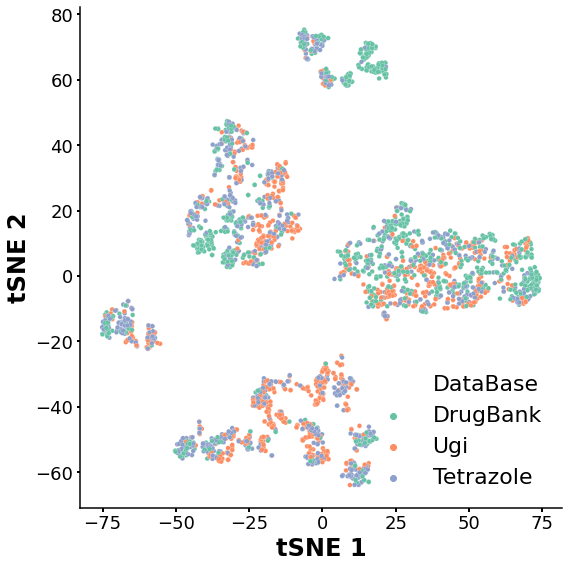

In [18]:
plt.rcParams['axes.linewidth'] = 1.5
fig, ax = plt.subplots(figsize=(8,8))

ax=sns.scatterplot('TC1','TC2',data=Data, hue='DataBase',s=22,palette=sns.color_palette("Set2", 3),linewidth=0.2,alpha=1)
        

plt.xlabel ('tSNE 1',fontsize=24,fontweight='bold')

plt.ylabel ('tSNE 2',fontsize=24,fontweight='bold')

plt.tick_params ('both',width=2,labelsize=18)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend(loc='lower right',frameon=False,prop={'size': 22},ncol=1)

plt.tight_layout()
plt.savefig('tSNE.png',dpi=300,quality=95,format='png')
plt.show()

In [ ]:
Data.to_excel('tSNE_results.xlsx')

## Radar chart

In [ ]:
x=Data.groupby('DataBase')

In [ ]:
DB=x.get_group('Ugi')
data=pd.DataFrame()

In [ ]:
data['MolWt']=[i/500 for i in DB['MolWt']]
data['LogP']=[i/5 for i in DB['LogP']]
data['NumHAcceptors']=[i/10 for i in DB['NumHAcceptors']]
data['NumHDonors']=[i/5 for i in DB['NumHDonors']]
data['NumRotableBonds']=[i/10 for i in DB['NumRotableBonds']]
data['TPSA']=[i/140 for i in DB['TPSA']]

In [ ]:
categories=list(data.columns)
N = len(categories)
values=data[categories].values[0]
values=np.append(values,values[:1])
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

Ro5_up=[1,1,1,1,1,1,1]
Ro5_low=[0.5,0,0,0,0,0,0.5]

In [ ]:
fig=plt.figure(figsize=(8,8))

ax = fig.add_axes([1, 1, 1, 1],projection='polar')

plt.title('Ugi',size=26,weight='bold')

plt.xticks(angles, [i.split('_')[0] for i in categories],color='k',size=24,ha='center',va='top',fontweight='bold')

plt.tick_params(axis='y',width=2,labelsize=18, grid_alpha=0.15)

ax.set_rlabel_position(0)

ax.plot(angles, Ro5_up, linewidth=2, linestyle='solid',color='red')
ax.plot(angles, Ro5_low, linewidth=2, linestyle='solid',color='red')

#ax.fill(angles, Ro5_up, 'red', alpha=0.2)
#ax.fill(angles, Ro5_low, 'red', alpha=0.2)



for i in range(len(data.index)):
    values=data[categories].values[i]
    values=np.append(values,values[:1])
    ax.plot(angles, values, linewidth=0.5 ,color='k', linestyle='-',alpha=0.05)
    #ax.fill(angles, values, 'C2', alpha=0.025)

plt.ylim(-2,3)
fig.savefig('Ugi_radar.png',dpi=300,quality=95,format='png',bbox_inches='tight')
plt.show()